In [22]:
# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/simple_plot.html
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

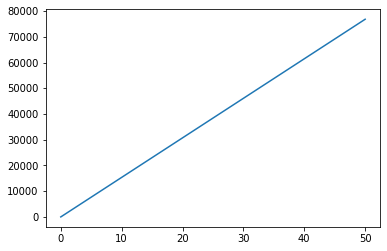

In [56]:
def affine(ptA, ptB):
    """
    y = ax + b from (A, B)
    Example:
     ptA: 153.8 = a * 0.10 + b
     ptB: 7484.7 = a * 4.87 + b
       (7484.7 - 153.8) = a (4.87 - 0.10) => a = (7484.7 - 153.8) / (4.87 - 0.10) = 1536.876
       b = 7484.7 - a * 4.87 = 7484.7 - a * 4.87 = .11236
       => y = 1536.876 * x + .11236
    """
    coeff = [] 
    coeff.append((ptB[1] - ptA[1]) / (ptB[0] - ptA[0]))
    coeff.append(ptB[1] - coeff[0] * ptB[0])
    return(coeff)


pointA = [0.10, 153.8]  # AI, FLOP/s
pointB = [4.87, 7484.7] # AI, FLOP/s
coeff = affine(pointA, pointB)
x = np.linspace(0, 50, 2) # start, stop, num=50
y = coeff[0] * x + coeff[1]

fig, ax = plt.subplots()
ax.plot(x, y)

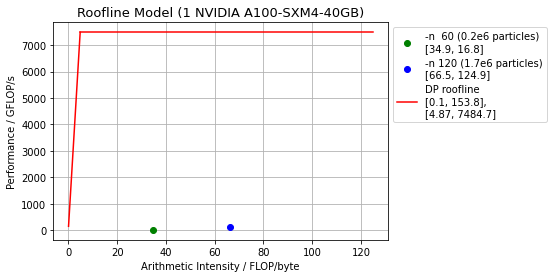

findneighbors


In [121]:
# https://github.com/mohamed/roofline.git  
START = -4 ;STOP = 6 ;N = abs(STOP - START + 1) # N=11
# arithmetic_intensity = np.logspace(START, STOP, num=N, base=2)
# array([6.25e-02, 1.25e-01, 2.50e-01, 5.00e-01, 1.00e+00, 2.00e+00, 4.00e+00, 8.00e+00, 1.60e+01, 3.20e+01, 6.40e+01])
arithmetic_intensity = np.array([0.01, 0.1, 1, 10, 100, 1000])
platforms = ['NVIDIA V100', 'NVIDIA P100']
# achievable_performance = np.zeros((len(platforms), len(arithmetic_intensity)))
# achievable_performance = np.array([6.25e-02, 1.25e-01, 2.50e-01, 5.00e-01, 1.00e+00, 2.00e+00, 4.00e+00, 8.00e+00, 1.60e+01, 3.20e+01, 6.40e+01])
achievable_performance = np.array([6.25e-02, 1.25e-01, 2.50e-01, 5.00e-01, 1.00e+00, 2.00e+00])


# fig, axes = plt.subplots(2, 1) # 2
fig, axes = plt.subplots()

axis.set_xscale('log', base=2)
axis.set_yscale('log', base=2)

#plt.setp(axes,
#         xticks=arithmetic_intensity,
#         yticks=np.logspace(1, 20, num=20, base=2))  
# plt.setp(axes,
#         xticks=[0.01, 0.1, 1, 10],
#         yticks=[0.001, 0.01, 0.1, 1, 10])
         # xticks=[0.01, 0.1, 1, 10, 100, 1000],
         # yticks=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
# axis.grid(True, which='major')

achieved = {
  'n060': [34.9, 16.8], # AI, GFLOP/s
  'n120': [66.5, 124.9], # AI, GFLOP/s
  'n240': [13.14, 752.9], # AI, GFLOP/s
}
plt.plot(achieved['n060'][0], achieved['n060'][1], 'go', label=f"-n  60 (0.2e6 particles)\n{achieved['n060']}");
plt.plot(achieved['n120'][0], achieved['n120'][1], 'bo', label=f"-n 120 (1.7e6 particles)\n{achieved['n120']}"); # plt.legend();   
# plt.plot(achieved['n240'][0], achieved['n240'][1], 'ro', label='-n 240 (13.8e6 particles)'); # plt.legend();   

# DP roofline:
# 'n060', [0.1, 155.4], [4.87, 7565.2], 
# 'n120', [0.1, 153.8], [4.87, 7484.7],
# 'n240', [0.01, 15.55], [4.87, 7566.0]
pointA = [0.10, 153.8]  # AI, FLOP/s
pointB = [4.87, 7484.7] # AI, FLOP/s
# pointA = [0.10, 153.8]  # AI, FLOP/s
# pointB = [4.87, 7484.7] # AI, FLOP/s
coeff = affine(pointA, pointB)
x = np.linspace(pointA[0], pointB[0], 2) # start, stop, num=50
y = coeff[0] * x + coeff[1]
axes.plot(x, y, 'r') #, label='DP roofline')

# horiz line: a=0, b=cte 
# x = np.linspace(10, 1100, 2) # start, stop, num=50
x = np.linspace(pointB[0], achieved['n120'][1], 2) # start, stop, num=50
y = np.array([pointB[1], pointB[1]])
axes.plot(x, y, 'r', label=f'DP roofline\n{pointA},\n{pointB}')

axes.set_title('Roofline Model (1 NVIDIA A100-SXM4-40GB)', fontsize=13)
# label = 
axes.set_xlabel('Arithmetic Intensity / FLOP/byte') # fontsize=8)
# axes.xaxis.set_label_coords(1.05, -0.025)

axes.set_ylabel('Performance / GFLOP/s')
plt.grid()
# fig.tight_layout()
# fig.savefig('/tmp/test.png')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()
print('findneighbors')

In [69]:
axes

<AxesSubplot:title={'center':'Roofline Model (NVIDIA A100-SXM4-40GB)'}, ylabel='Performance / FLOP/s'>

No handles with labels found to put in legend.


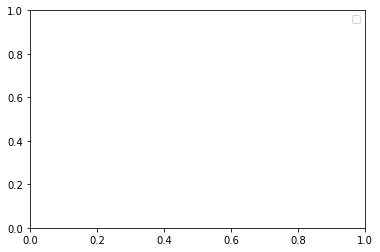